In [39]:
import numpy as np
# import cupy as cp
from scipy.fft import fftn, ifftn, fftfreq, fftshift, ifftshift
import matplotlib.pyplot as plt

In [40]:
omega_1 = 0.5
omega_2 = 1.0
def gaussian(x,y, sigma):
    return 1/(2*np.pi*np.square(sigma))*np.exp(-(np.square(x)+np.square(y))/(4*np.square(sigma)))
def unnormalized_gaussian(x,y,omega):
    return np.sqrt(2*np.pi)*omega*gaussian(x,y,omega)
def position_amp_mag(x,y):
    return unnormalized_gaussian(x+2.,y+1.0,omega_1)/np.sqrt(2) + unnormalized_gaussian(x-0.3,y-4.,omega_1)/np.sqrt(2)
def momentum_amp_mag(fx,fy):
    return unnormalized_gaussian(2*np.pi*fx, 2*np.pi*fy, omega_2)

def unitary_ft(a, diststep):
    return fftshift(fftn(a)*diststep**2/(2*np.pi))

def unitary_ift(a, diststep):
    return fftshift(ifftn(2*np.pi*a/diststep**2))

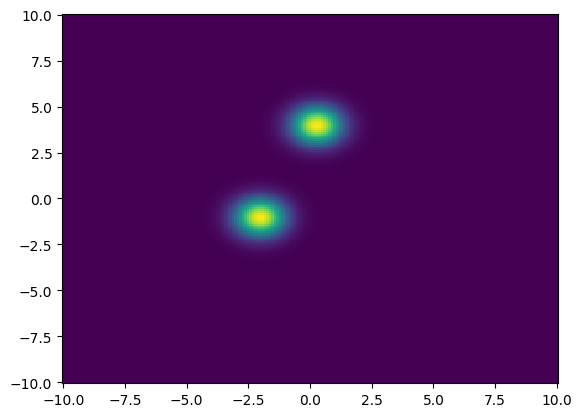

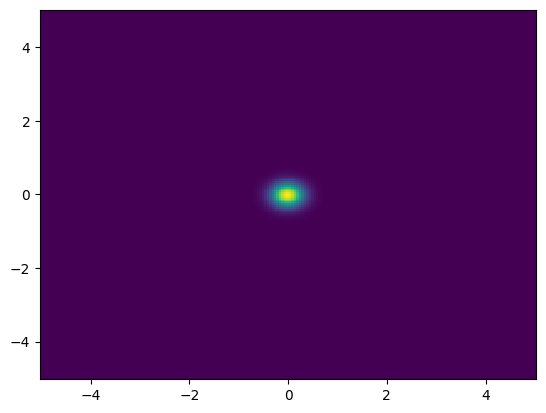

In [41]:
n = 201
rangeMin = -10.
rangeMax = 10.
diststep = (rangeMax-rangeMin)/n
delta_k = 2*np.pi/(n*diststep)
x = np.linspace(rangeMin, rangeMax, n)
y = np.linspace(rangeMin, rangeMax, n)
px = fftfreq(n, diststep)
py = fftfreq(n, diststep)

X, Y = np.meshgrid(x,y)
Px, Py = np.meshgrid(px, py)
Px_sorted, Py_sorted = fftshift(Px), fftshift(Py)

pos_amp_mag = position_amp_mag(X,Y)
# mom_amp_mag = np.abs(fftn(pos_amp_mag)*diststep**2/(2*np.pi))
unnormalized_mom_amp_mag = momentum_amp_mag(Px, Py)
mom_amp_mag = np.sqrt(np.sum(np.square(pos_amp_mag))*diststep**2/(np.sum(np.square(np.abs(unnormalized_mom_amp_mag)))*delta_k**2))*unnormalized_mom_amp_mag

plt.pcolor(X, Y, pos_amp_mag)
plt.show()
plt.pcolor(Px_sorted, Py_sorted, fftshift(mom_amp_mag))
# plt.show()

In [42]:
np.all(np.abs(fftn(fftshift(pos_amp_mag))) - np.abs(fftn(pos_amp_mag)) < 1e-11)

True

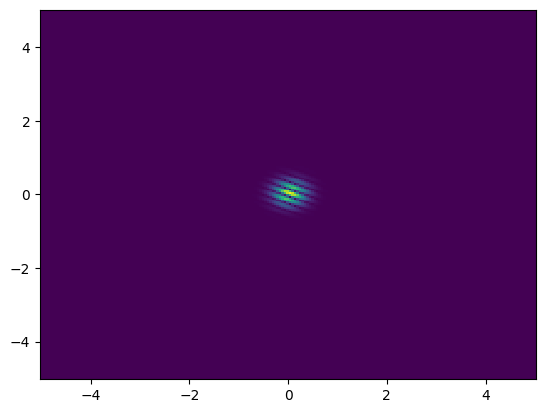

In [43]:
plt.pcolor(Px_sorted, Py_sorted, np.abs(ifftshift(fftn(pos_amp_mag))))

In [44]:
print(np.sum(np.square(pos_amp_mag))*diststep**2)
print(np.sum(np.square(np.abs(fftn(pos_amp_mag)*diststep**2/(2*np.pi))))*delta_k**2)
print(np.sum(np.square(np.abs(mom_amp_mag)))*delta_k**2)
print(np.sum(np.square(np.abs(ifftn(mom_amp_mag)*(2*np.pi/diststep**2))))*diststep**2)

0.9900747650922763
0.9900747650922764
0.9900747650922761
0.9900747650922762


In [45]:
print(delta_k)
print(2*np.pi*(Px_sorted[0][1] - Px_sorted[0][0]))

0.3141592653589793
0.3141592653589782


In [46]:
print(np.sum(Px*np.square(mom_amp_mag)), np.sum(Py*np.square(mom_amp_mag)))
print(np.sum(Px*np.square(np.abs(unitary_ft(pos_amp_mag, diststep)))), np.sum(Py*np.square(np.abs(unitary_ft(pos_amp_mag, diststep)))))

-2.7538578611351487e-17 -1.1102230246251565e-16
6.03557756408717 6.481918145851652


In [47]:
def one_step_of_GS(cur_pos, measured_pos_mag, measured_mom_mag, diststep):
    n = measured_pos_mag.shape[0]
    cur_mom = fftn(cur_pos)*diststep**2/(2*np.pi)
    next_mom = measured_mom_mag*np.exp(1j * np.angle(cur_mom))
    next_pos = ifftn(next_mom)*(2*np.pi/diststep**2)
    return measured_pos_mag*np.exp(1j * np.angle(next_pos)), next_mom

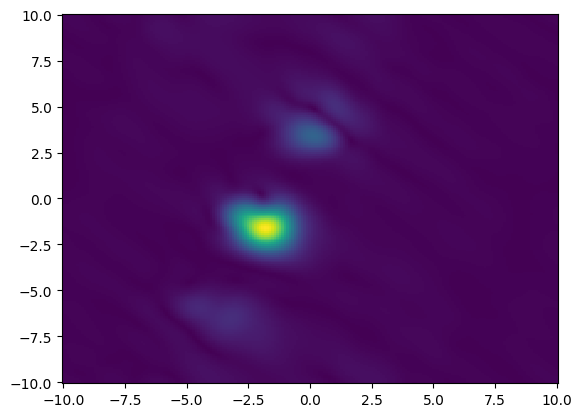

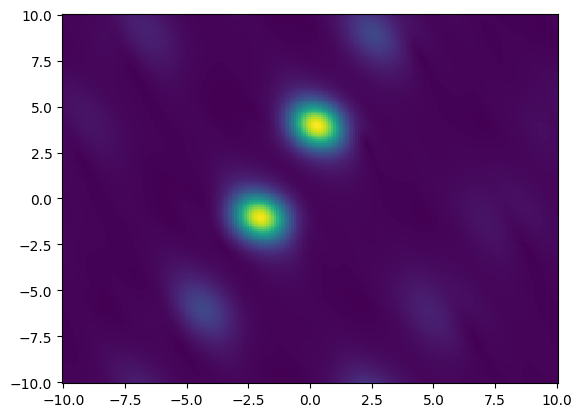

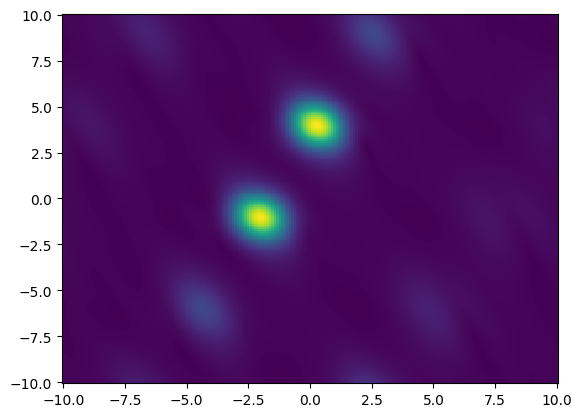

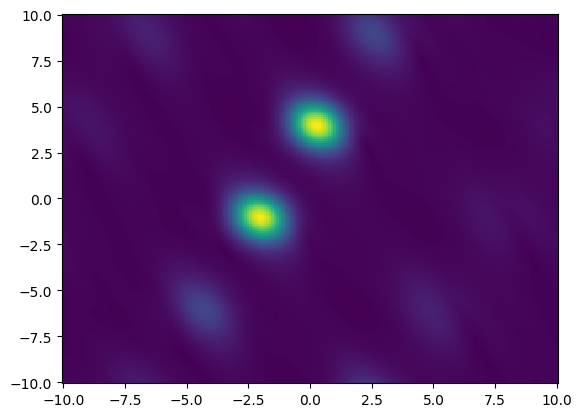

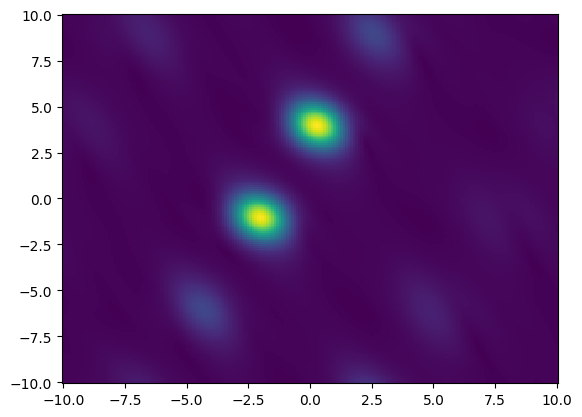

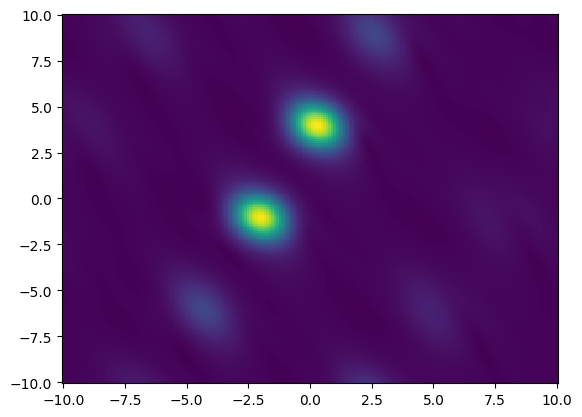

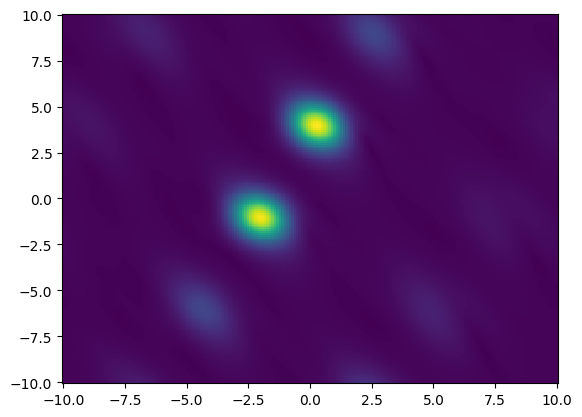

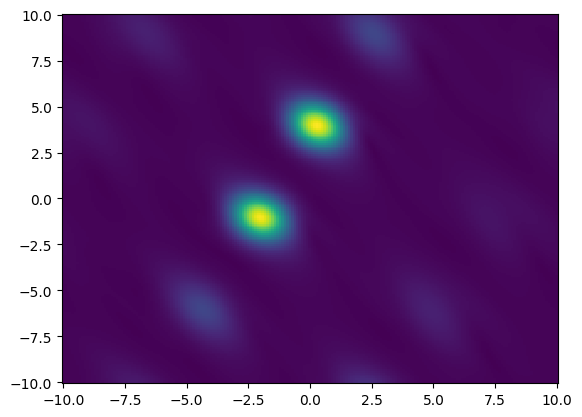

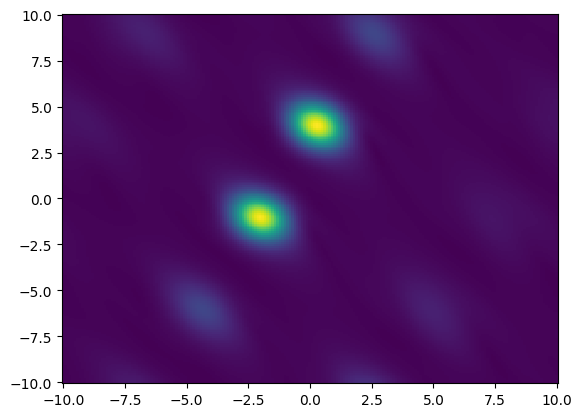

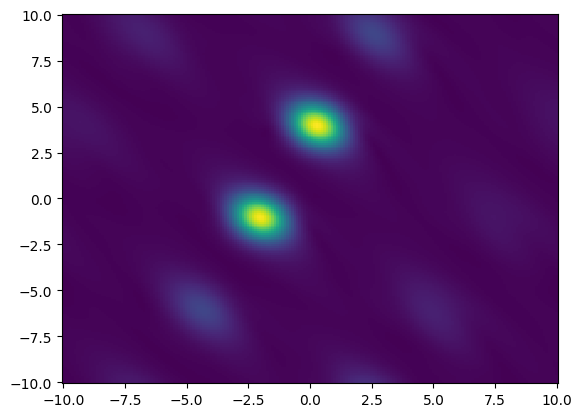

In [48]:
phi = 2*np.pi*np.random.random((n,n))
cur_pos_amp = pos_amp_mag*np.exp(1j*phi)
for i in range(0,100):
    cur_pos_amp, cur_mom_amp = one_step_of_GS(cur_pos_amp, pos_amp_mag, mom_amp_mag, diststep)
    # print(np.sum(np.square(np.abs(new_pos_amp)))*diststep**2)
    # plt.pcolor(Px_sorted, Py_sorted, np.abs(cur_mom_amp))
    if i % 10 == 0:
        plt.pcolor(X, Y, np.abs(ifftn(cur_mom_amp)*(2*np.pi/diststep**2)))
        plt.show()

In [49]:
# print(np.sum(np.square(np.abs(cur_mom_amp)))*delta_k**2)
# print(np.sum(np.square(np.abs(ifftn(cur_mom_amp)*(2*np.pi/diststep**2))))*diststep**2)

In [50]:
# # plt.pcolor(X.get(), Y.get(), fftshift(np.abs(cur_mom_amp)).get())
# plt.pcolor(Px_sorted, Py_sorted, fftshift(np.angle(cur_mom_amp)))

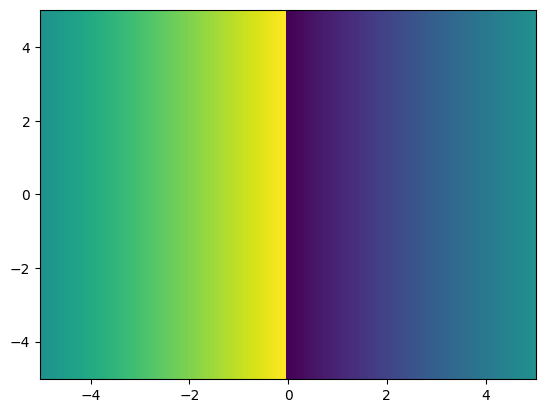

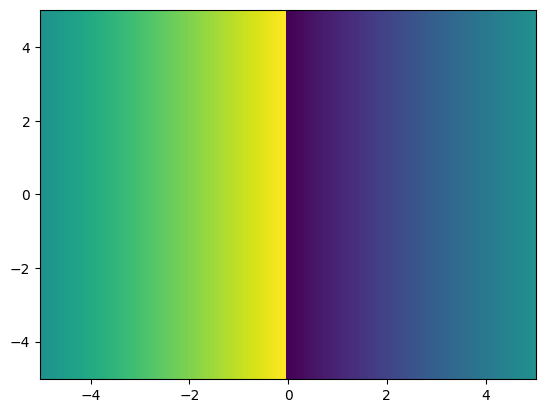

In [51]:
line = 0.02*X
phase = np.arctan2(np.sin(line), 1 + np.cos(line))
plt.pcolor(Px_sorted, Py_sorted, fftshift(line))
plt.show()
plt.pcolor(Px_sorted, Py_sorted, fftshift(phase))

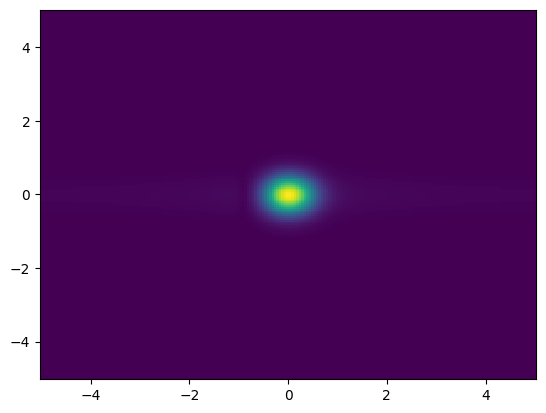

In [52]:
plt.pcolor(Px_sorted, Py_sorted, np.abs(fftshift(ifftn(mom_amp_mag*np.exp(1j*phase)))))

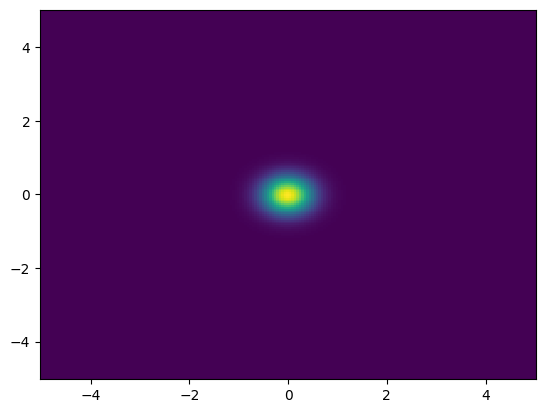

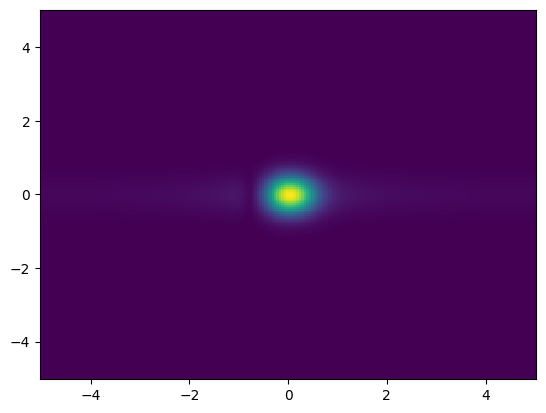

In [53]:
plt.pcolor(Px_sorted, Py_sorted, np.abs(fftshift(ifftn(mom_amp_mag))))
plt.show()
plt.pcolor(Px_sorted, Py_sorted, np.abs(fftshift(ifftn(mom_amp_mag*np.exp(1j*line)))))

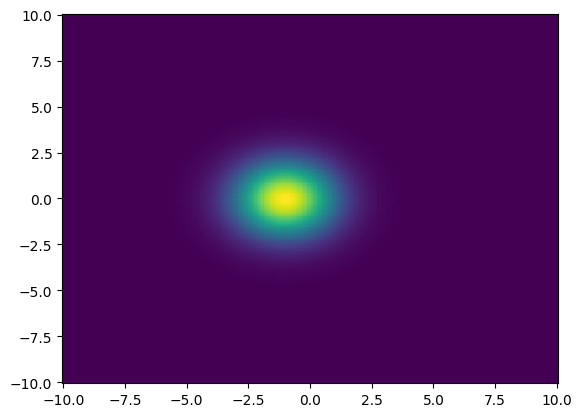

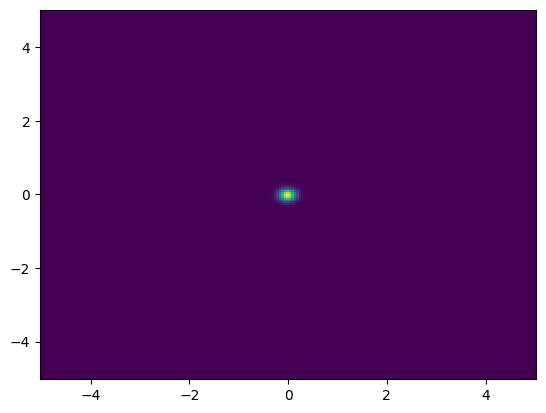

In [54]:
plt.pcolor(X, Y, unnormalized_gaussian(X+1.,Y,1.0))
plt.show()
plt.pcolor(Px_sorted, Py_sorted, fftshift(np.abs(fftn(fftshift(unnormalized_gaussian(X+1.,Y,1.0))))))

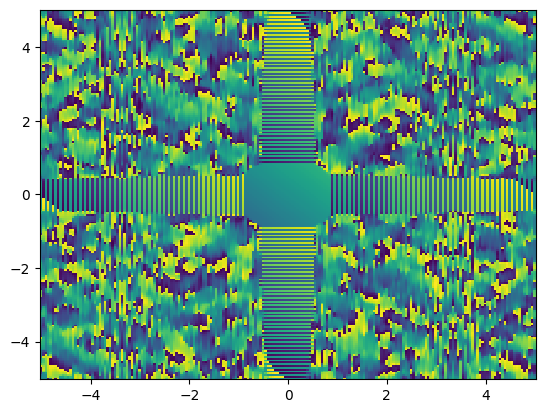

In [55]:
plt.pcolor(Px_sorted, Py_sorted, fftshift(np.angle(fftn(fftshift(unnormalized_gaussian(X,Y,1.0))))))

In [56]:
fftshift(np.angle(fftn(unnormalized_gaussian(X+1.,Y,1.0))))[80:120, 80:120]

array([[-1.90588174,  2.2279053 , -0.1400453 , ...,  0.06954117,
         2.70578137, -0.50765224],
       [ 1.29423543, -0.94330559,  2.71967289, ..., -3.11152872,
        -0.44604622,  2.83640384],
       [-1.71432546,  2.22836612, -0.53477216, ...,  0.17382926,
         2.63842642, -0.23770608],
       ...,
       [ 0.48330031, -2.90328876,  0.60616562, ...,  0.48164622,
        -2.54930509,  0.86081962],
       [-2.66539175,  0.23770608, -2.63842642, ..., -2.69863764,
         0.53477216, -2.22836612],
       [ 0.50844155, -2.83640384,  0.44604622, ...,  0.39890108,
        -2.71967289,  0.94330559]])